<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial2/Mejor_inversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

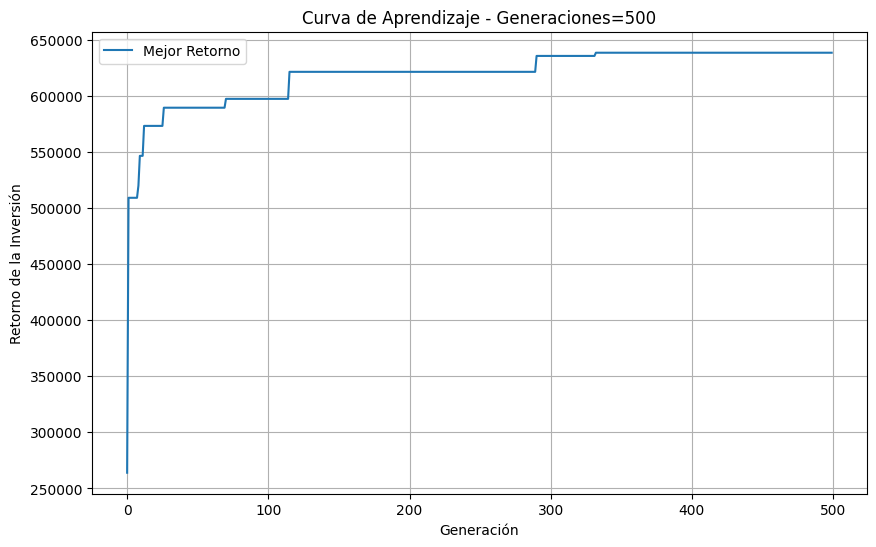

Mejor vector de inversión: [0.19994952 0.15472365 0.13652968 0.12702861 0.10662005 0.10039647
 0.10506297 0.06968906]
ID del mejor economist: 683
Inversiones según la solución: [199949.5192538  154723.64944404 136529.67553192 127028.61195522
 106620.04634191 100396.46552061 105062.9749201   69689.05703239]
Retorno mínimo posible: 638750.1122751933
Retorno máximo posible: 1065538.0869291094
Inversiones según la solución establecida: [185000. 152000. 137000. 125000. 116000. 107000.  96000.  82000.]
Retorno mínimo posible según la solución establecida: 574349.9999999999
Retorno máximo posible según la solución establecida: 1024580.0000000002


In [114]:
import numpy as np
import matplotlib.pyplot as plt


quotas = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
total_capital = 1000000


def calculate_min_return(weights, quotas, capital):
    returns = capital * (weights * quotas - 1)
    return np.min(returns)

# Clase para el algoritmo de optimización
class Economist:
    def __init__(self, quotas, capital, num_individuals=500, generations=500, mutation_rate=0.03):
        self.quotas = quotas
        self.capital = capital
        self.population = np.random.rand(num_individuals, len(quotas))
        self.population /= self.population.sum(axis=1, keepdims=True)  # Normalización
        self.num_individuals = num_individuals
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.ids = np.arange(num_individuals)

    def evaluate_fitness(self, individual):
        return calculate_min_return(individual, self.quotas, self.capital)

    def mutate(self, individual):
        mutation = individual + np.random.normal(0, self.mutation_rate, individual.shape)
        mutation = np.clip(mutation, 0, None)  # Evitar negativos, clip es mas sencillo y evita errores logicos
        return mutation / mutation.sum()

    def select_parents(self, fitness):
        # Selección por torneo
        indices = np.random.choice(range(self.num_individuals), size=2, replace=False)
        if fitness[indices[0]] > fitness[indices[1]]:
            return self.population[indices[0]], self.ids[indices[0]]
        else:
            return self.population[indices[1]], self.ids[indices[1]]

    def evolve(self):
        fitness_history = []
        for generation in range(self.generations):
            fitness = np.array([self.evaluate_fitness(ind) for ind in self.population])
            best_indices = np.argsort(fitness)[-self.num_individuals // 2:]  # Mejor la mitad
            best = self.population[best_indices]
            best_ids = self.ids[best_indices]

            new_individuals = []
            while len(new_individuals) < self.num_individuals - len(best):
                parent1, id1 = self.select_parents(fitness)
                parent2, id2 = self.select_parents(fitness)
                child = (parent1 + parent2) / 2
                child = self.mutate(child)
                new_individuals.append(child)


            new_ids = np.arange(self.num_individuals, self.num_individuals + len(new_individuals))

            self.population = np.vstack((best, new_individuals))
            self.ids = np.concatenate((best_ids, new_ids))
            fitness_history.append(np.max(fitness))

        best_weights = self.population[np.argmax(fitness)]
        best_id = self.ids[np.argmax(fitness)]
        return fitness_history, best_weights, best_id

# Ejecutar el optimizador
economist = Economist(quotas, total_capital)
history, best_weights_final, best_id_final = economist.evolve()

# Graficar la historia de la aptitud
plt.figure(figsize=(10, 6))
plt.plot(history, label='Mejor Retorno')
plt.title("Curva de Aprendizaje - Generaciones=500")
plt.xlabel("Generación")
plt.ylabel("Retorno de la Inversión")
plt.legend()
plt.grid()
plt.show()

# Resultados finales
print("Mejor vector de inversión:", best_weights_final)
print("ID del mejor economist:", best_id_final)

# Solución
investments = best_weights_final * total_capital
print("Inversiones según la solución:", investments)

# Calcular el retorno mínimo
min_return = calculate_min_return(best_weights_final, quotas, total_capital)

# Calcular el retorno máximo posible
max_return = total_capital * (np.max(best_weights_final * quotas - 1))
print("Retorno mínimo posible:", min_return)
print("Retorno máximo posible:", max_return)

# Solución establecida
weight_vector = np.array([0.185, 0.152, 0.137, 0.125, 0.116, 0.107, 0.096, 0.082])
investments_solution = weight_vector * total_capital
print("Inversiones según la solución establecida:", investments_solution)

# Calcular retornos con la solución establecida
min_return_solution = calculate_min_return(weight_vector, quotas, total_capital)
max_return_solution = total_capital * (np.max(weight_vector * quotas - 1))
print("Retorno mínimo posible según la solución establecida:", min_return_solution)
print("Retorno máximo posible según la solución establecida:", max_return_solution)
